# Gesture Classification Using Time Series Algorithms
Docs: https://www.sktime.net/en/latest/examples/02_classification.html  
Data: http://www.timeseriesclassification.com/description.php?Dataset=UWaveGestureLibrary  
Loading data: https://www.sktime.net/en/latest/examples/data/loading_data.html?highlight=arff

In [45]:
import sktime
import matplotlib.pyplot as plt
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.kernel_based import Arsenal
from sktime.classification.hybrid import HIVECOTEV2
from sktime.datasets import load_from_tsfile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_x, train_y = load_from_tsfile('data/UWaveGestureLibrary_TRAIN.ts')
test_x, test_y = load_from_tsfile('data/UWaveGestureLibrary_TEST.ts')

In [3]:
train_x.head()

,dim_0,dim_1,dim_2
0,0 0.31745 1 0.31745 2 0.31745 3...,0 -1.43450 1 -1.43450 2 -1.43450 3...,0 -0.42612 1 -0.42612 2 -0.42612 3...
1,0 0.013633 1 0.013633 2 0.01363...,0 -1.00840 1 -1.00840 2 -1.00840 3...,0 -1.13980 1 -1.13980 2 -1.13980 3...
2,0 -1.40750 1 -1.40750 2 -1.40750 3...,0 0.69579 1 0.69579 2 0.69579 3...,0 -1.10570 1 -1.10570 2 -1.10570 3...
3,0 -0.044749 1 -0.044749 2 -0.04474...,0 -0.79333 1 -0.79333 2 -0.79333 3...,0 -1.51220 1 -1.51220 2 -1.51220 3...
4,0 -0.40006 1 -0.40006 2 -0.40006 3...,0 -1.0945 1 -1.0945 2 -1.0945 3 ...,0 -0.362550 1 -0.362550 2 -0.36255...


In [4]:
train_y[:50]

array(['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0',
       '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0', '3.0',
       '4.0', '4.0', '4.0', '4.0', '4.0'], dtype='<U3')

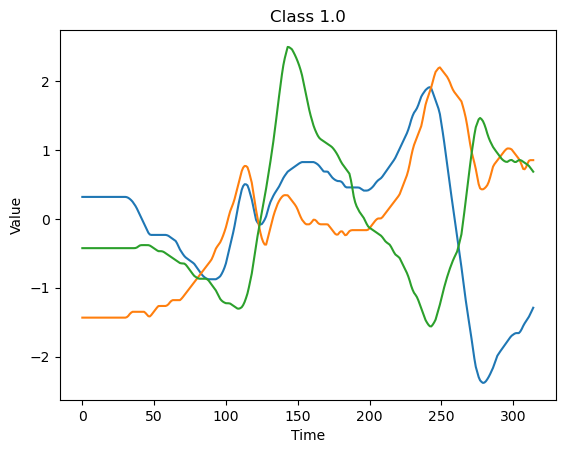

In [22]:
plt.plot(train_x.loc[0, 'dim_0'])
plt.plot(train_x.loc[0, 'dim_1'])
plt.plot(train_x.loc[0, 'dim_2'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Class 1.0')
plt.show()

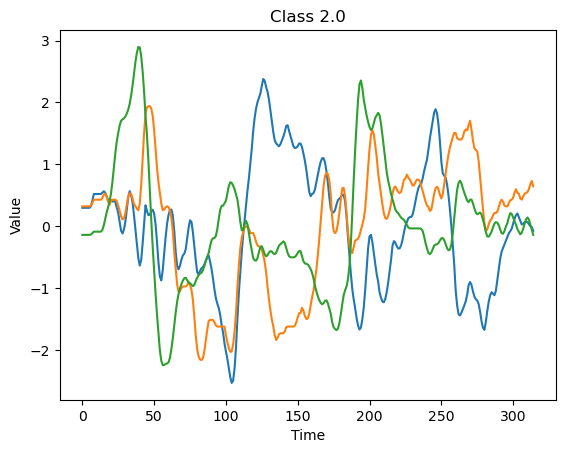

In [24]:
plt.plot(train_x.loc[15, 'dim_0'])
plt.plot(train_x.loc[15, 'dim_1'])
plt.plot(train_x.loc[15, 'dim_2'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Class 2.0')
plt.show()

## Rocket Classifier
RandOM Convolutional KErnel Transform is based on a pipeline combination of the ROCKET transformation (transformations.panel.rocket) and the sklearn RidgeClassifierCV classifier. The RocketClassifier is configurable to use variants MiniRocket and MultiRocket. ROCKET is based on generating random convolutional kernels. A large number are generated, then a linear classifier is built on the output.

Reference: https://arxiv.org/abs/1910.13051

In [19]:
rocket = RocketClassifier(num_kernels=20000, n_jobs=-1, use_multivariate='yes')
rocket.fit(train_x, train_y)
y_pred = rocket.predict(test_x)

accuracy_score(test_y, y_pred)

0.934375

In [21]:
mrocket = RocketClassifier(num_kernels=20000, n_jobs=-1, rocket_transform='minirocket', use_multivariate='yes')
mrocket.fit(train_x, train_y)
y_pred = mrocket.predict(test_x)

accuracy_score(test_y, y_pred)

0.934375

In [23]:
trocket = RocketClassifier()
trocket.fit(train_x, train_y)
y_pred = trocket.predict(test_x)

accuracy_score(test_y, y_pred)

0.940625

In [48]:
# explore hyperparameters
rkt = RocketClassifier()
parameters = {'num_kernels': [1000, 5000, 10000, 20000], 'rocket_transform': ['rocket', 'minirocket', 'multirocket']}
param_obj = GridSearchCV(rkt, parameters, n_jobs=-1, verbose=4)

param_obj.fit(train_x, train_y)
y_param_pred = param_obj.predict(test_x)

accuracy_score(test_y, y_param_pred)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

[CV 1/5] END num_kernels=1000, rocket_transform=minirocket;, score=0.917 total time=   2.0s
[CV 3/5] END num_kernels=1000, rocket_transform=minirocket;, score=0.917 total time=   2.1s
[CV 2/5] END num_kernels=1000, rocket_transform=minirocket;, score=0.833 total time=   2.1s
[CV 4/5] END num_kernels=1000, rocket_transform=minirocket;, score=0.917 total time=   2.2s
[CV 5/5] END num_kernels=1000, rocket_transform=minirocket;, score=0.917 total time=   2.2s
[CV 1/5] END num_kernels=1000, rocket_transform=rocket;, score=0.875 total time=   4.2s
[CV 2/5] END num_kernels=1000, rocket_transform=rocket;, score=0.875 total time=   4.3s
[CV 4/5] END num_kernels=1000, rocket_transform=rocket;, score=0.917 total time=   4.3s
[CV 3/5] END num_kernels=1000, rocket_transform=rocket;, score=0.917 total time=   4.5s
[CV 5/5] END num_kernels=1000, rocket_transform=rocket;, score=0.958 total time=   4.5s
[CV 2/5] END num_kernels=5000, rocket_transform=minirocket;, score=0.833 total time=   5.0s
[CV 1/5]

0.9375

In [49]:
print("Best: {:.3f} using {}".format(param_obj.best_score_, param_obj.best_params_))
means = param_obj.cv_results_['mean_test_score']
stds = param_obj.cv_results_['std_test_score']
params = param_obj.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Accuracy: {:.3f}, stdev: {:.3f}, params: {}".format(mean, stdev, param))

Best: 0.942 using {'num_kernels': 10000, 'rocket_transform': 'rocket'}
Accuracy: 0.908, stdev: 0.031, params: {'num_kernels': 1000, 'rocket_transform': 'rocket'}
Accuracy: 0.900, stdev: 0.033, params: {'num_kernels': 1000, 'rocket_transform': 'minirocket'}
Accuracy: 0.908, stdev: 0.017, params: {'num_kernels': 1000, 'rocket_transform': 'multirocket'}
Accuracy: 0.933, stdev: 0.020, params: {'num_kernels': 5000, 'rocket_transform': 'rocket'}
Accuracy: 0.900, stdev: 0.042, params: {'num_kernels': 5000, 'rocket_transform': 'minirocket'}
Accuracy: 0.883, stdev: 0.017, params: {'num_kernels': 5000, 'rocket_transform': 'multirocket'}
Accuracy: 0.942, stdev: 0.020, params: {'num_kernels': 10000, 'rocket_transform': 'rocket'}
Accuracy: 0.917, stdev: 0.026, params: {'num_kernels': 10000, 'rocket_transform': 'minirocket'}
Accuracy: 0.917, stdev: 0.037, params: {'num_kernels': 10000, 'rocket_transform': 'multirocket'}
Accuracy: 0.942, stdev: 0.020, params: {'num_kernels': 20000, 'rocket_transform'

## HIVE-COTE 2.0

The HIerarchical VotE Collective of Transformation-based Ensembles is a meta ensemble that combines classifiers built on different representations. Version 2 combines DrCIF, TDE, an ensemble of RocketClassifiers called the Arsenal and the ShapeletTransformClassifier. It is one of the most accurate classifiers on the UCR and UEA time series archives.

Reference: https://link.springer.com/article/10.1007/s10994-021-06057-9

In [56]:
hc2 = HIVECOTEV2(n_jobs=-1)
hc2.fit(train_x, train_y)
y_pred = hc2.predict(test_x)

accuracy_score(test_y, y_pred)

/home/lkeon/anaconda3/envs/mldev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, 

0.940625

## Arsenal
An ensemble of ROCKET transformers using RidgeClassifierCV base classifier. Weights each classifier using the accuracy from the ridge cross-validation. Allows for generation of probability estimates at the expense of scalability compared to RocketClassifier.

In [62]:
ars = Arsenal()
ars.fit(train_x, train_y)
y_pred = ars.predict(test_x)

accuracy_score(test_y, y_pred)

0.9375

In [65]:
# create grid search
ars_param = {'num_kernels': [1000, 2000, 5000, 10000], 'n_estimators': [15, 25, 50]}
ars_grid = GridSearchCV(estimator=Arsenal(), param_grid=ars_param, n_jobs=-1, verbose=4)

ars_grid.fit(train_x, train_y)
y_param_grid = ars_grid.predict(test_x)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

[CV 1/5] END .n_estimators=15, num_kernels=1000;, score=0.917 total time=  24.0s
[CV 3/5] END .n_estimators=15, num_kernels=1000;, score=0.917 total time=  24.1s
[CV 5/5] END .n_estimators=15, num_kernels=1000;, score=0.958 total time=  24.2s
[CV 2/5] END .n_estimators=15, num_kernels=1000;, score=0.917 total time=  24.7s
[CV 4/5] END .n_estimators=15, num_kernels=1000;, score=0.958 total time=  25.1s
[CV 1/5] END .n_estimators=25, num_kernels=1000;, score=0.917 total time=  39.7s
[CV 2/5] END .n_estimators=25, num_kernels=1000;, score=0.875 total time=  39.8s
[CV 5/5] END .n_estimators=25, num_kernels=1000;, score=0.958 total time=  39.6s
[CV 4/5] END .n_estimators=25, num_kernels=1000;, score=0.958 total time=  40.4s
[CV 3/5] END .n_estimators=25, num_kernels=1000;, score=0.958 total time=  41.0s
[CV 4/5] END .n_estimators=15, num_kernels=2000;, score=0.958 total time=  46.6s
[CV 5/5] END .n_estimators=15, num_kernels=2000;, score=0.958 total time=  47.0s
[CV 1/5] END .n_estimators=1

In [287]:
def analyse_grid(grid_obj):
    print("Best: {:.3f} using {}".format(grid_obj.best_score_, grid_obj.best_params_))
    means = grid_obj.cv_results_['mean_test_score']
    stds = grid_obj.cv_results_['std_test_score']
    params = grid_obj.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Accuracy: {:.3f}, stdev: {:.3f}, params: {}".format(mean, stdev, param))

In [67]:
analyse_grid(ars_grid)

Best: 0.942 using {'n_estimators': 15, 'num_kernels': 2000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 15, 'num_kernels': 1000}
Accuracy: 0.942, stdev: 0.020, params: {'n_estimators': 15, 'num_kernels': 2000}
Accuracy: 0.942, stdev: 0.020, params: {'n_estimators': 15, 'num_kernels': 5000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 15, 'num_kernels': 10000}
Accuracy: 0.933, stdev: 0.033, params: {'n_estimators': 25, 'num_kernels': 1000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 25, 'num_kernels': 2000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 25, 'num_kernels': 5000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 25, 'num_kernels': 10000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 50, 'num_kernels': 1000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 50, 'num_kernels': 2000}
Accuracy: 0.933, stdev: 0.020, params: {'n_estimators': 50, 'num_kernels': 5000}
Accuracy: 0.933, stdev: 0.020, params: {'n_esti

## Rocket Transformer and XGBoost
Combine Rocket feature extractor and XGBoost gradient boosted decision trees.

In [120]:
from sktime.classification.compose import SklearnClassifierPipeline
from sktime.transformations.panel.rocket import MiniRocketMultivariate
from sklearn.metrics import auc, accuracy_score, confusion_matrix
import xgboost as xgb
import numpy as np

In [132]:
# Import data as numpy arrays
train_xn, train_yn = load_from_tsfile('data/UWaveGestureLibrary_TRAIN.ts', return_data_type='numpy3d')
test_xn, test_yn = load_from_tsfile('data/UWaveGestureLibrary_TEST.ts', return_data_type='numpy3d')

In [133]:
# Transform classes to integer arrays compatible with XGBoost
train_yn = train_yn.astype('float').astype('int')
train_yn = train_yn - 1  # xgboost requiers classes to start from 0

test_yn = test_yn.astype('float').astype('int')
test_yn = test_yn - 1  # xgboost requiers classes to start from 0

In [184]:
# Extract features from time series using Mini Rocket algorithm
mrt = MiniRocketMultivariate(num_kernels=20000, max_dilations_per_kernel=32).fit(train_xn)
train_xn_features = mrt.transform(train_xn).to_numpy()
test_xn_features = mrt.transform(test_xn).to_numpy()

In [183]:
# Fit XGBoost model to the derived features
xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_kernels=300, seed=42)
xgb_model.fit(train_xn_features, train_yn)
y_pred = xgb_model.predict(test_xn_features)
accuracy_score(test_yn, y_pred)

0.859375

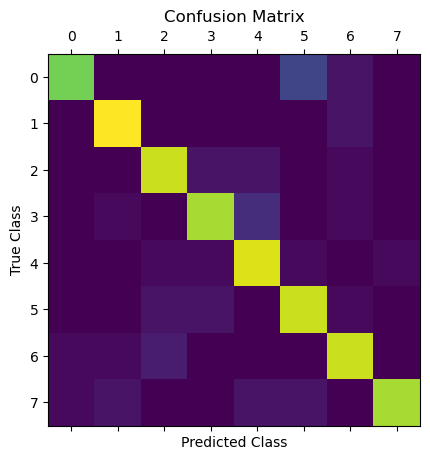

In [173]:
plt.matshow(confusion_matrix(test_yn, y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class');

In [179]:
# Predict probabilities of classification
prb = xgb_model.predict_proba(test_xn_features)
ii = 10
print('Data series {} predicted to be class {} with probability {:.2f}%.'.format(ii, prb[ii].argmax(), 100*prb[ii].max()))

Data series 10 predicted to be class 0 with probability 94.69%.


### XGBoost Learning Curves
Reference: https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

In [289]:
from sklearn.metrics import log_loss

In [290]:
# define data for evaluation
evalset = [(train_xn_features, train_yn), (test_xn_features, test_yn)]

In [291]:
xgb_model_eval = xgb.XGBClassifier(objective='multi:softprob',
                                   n_estimators=200, seed=42,
                                   eval_metric=log_loss,
                                   subsample=0.5,
                                   colsample_bytree=0.5)
xgb_model_eval.fit(train_xn_features, train_yn, eval_set=evalset) # training on test as it has more entries

[0]	validation_0-mlogloss:1.62286	validation_0-log_loss:1.62286	validation_1-mlogloss:1.78734	validation_1-log_loss:1.78734
[1]	validation_0-mlogloss:1.28701	validation_0-log_loss:1.28701	validation_1-mlogloss:1.53435	validation_1-log_loss:1.53435
[2]	validation_0-mlogloss:1.08103	validation_0-log_loss:1.08103	validation_1-mlogloss:1.40412	validation_1-log_loss:1.40412
[3]	validation_0-mlogloss:0.90019	validation_0-log_loss:0.90019	validation_1-mlogloss:1.28738	validation_1-log_loss:1.28738
[4]	validation_0-mlogloss:0.73819	validation_0-log_loss:0.73819	validation_1-mlogloss:1.14541	validation_1-log_loss:1.14542
[5]	validation_0-mlogloss:0.60388	validation_0-log_loss:0.60388	validation_1-mlogloss:1.03453	validation_1-log_loss:1.03452
[6]	validation_0-mlogloss:0.52091	validation_0-log_loss:0.52091	validation_1-mlogloss:0.95982	validation_1-log_loss:0.95982
[7]	validation_0-mlogloss:0.43416	validation_0-log_loss:0.43417	validation_1-mlogloss:0.88685	validation_1-log_loss:0.88685
[8]	vali

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=<function log_loss at 0x7f214e4fc820>,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

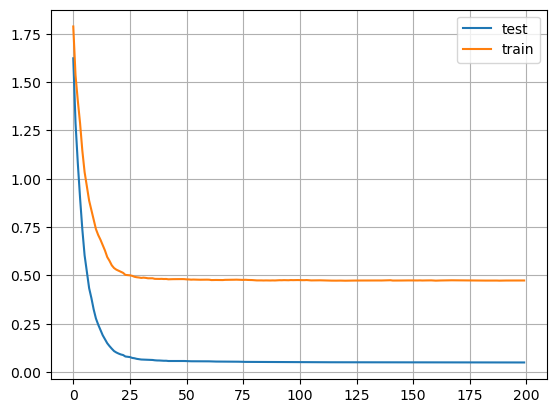

In [292]:
results = xgb_model_eval.evals_result()
plt.plot(results['validation_0']['mlogloss'], label='test')
plt.plot(results['validation_1']['mlogloss'], label='train')
plt.legend()
plt.grid()
plt.show()

In [278]:
y_pred = xgb_model_eval.predict(train_xn_features)
accuracy_score(train_yn, y_pred)

0.9166666666666666

### Hyperparameter Optimisation

In [293]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

In [294]:
xgb_model_opt = xgb.XGBClassifier(objective='multi:softprob',
                                  seed=42)

param_dist = {'subsample': [0.25, 0.5, 0.75],
              'colsample_bytree': [0.25, 0.5, 0.75],
              'n_estimators': [50, 100, 200, 1000]}

In [295]:
random_search = RandomizedSearchCV(xgb_model_opt, param_distributions=param_dist, n_iter=20, n_jobs=-1)
random_search.fit(train_xn_features, train_yn)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.25, 0.5, 0.75],
                                        'n_estimators': [50, 100, 200, 1000],
                                        'subsample': [0.25, 0.5, 0.75]})

In [296]:
analyse_grid(random_search)

Best: 0.917 using {'subsample': 0.75, 'n_estimators': 100, 'colsample_bytree': 0.25}
Accuracy: 0.792, stdev: 0.026, params: {'subsample': 0.25, 'n_estimators': 100, 'colsample_bytree': 0.75}
Accuracy: 0.792, stdev: 0.102, params: {'subsample': 0.25, 'n_estimators': 50, 'colsample_bytree': 0.25}
Accuracy: 0.808, stdev: 0.050, params: {'subsample': 0.25, 'n_estimators': 200, 'colsample_bytree': 0.5}
Accuracy: 0.800, stdev: 0.067, params: {'subsample': 0.25, 'n_estimators': 1000, 'colsample_bytree': 0.5}
Accuracy: 0.817, stdev: 0.062, params: {'subsample': 0.75, 'n_estimators': 50, 'colsample_bytree': 0.5}
Accuracy: 0.808, stdev: 0.086, params: {'subsample': 0.25, 'n_estimators': 100, 'colsample_bytree': 0.25}
Accuracy: 0.817, stdev: 0.062, params: {'subsample': 0.75, 'n_estimators': 100, 'colsample_bytree': 0.5}
Accuracy: 0.817, stdev: 0.062, params: {'subsample': 0.5, 'n_estimators': 200, 'colsample_bytree': 0.5}
Accuracy: 0.825, stdev: 0.067, params: {'subsample': 0.5, 'n_estimators': 

## Shapelet Transform Classifier


In [297]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

In [301]:
# fit default model
stc_model = ShapeletTransformClassifier()
model_stc = stc_model.fit(train_x, train_y)

In [302]:
y_pred = stc_model.predict(test_x)
accuracy_score(y_pred, test_y)

0.871875

In [304]:
# optimise STC
stc_param = {'n_shapelet_samples': [2000, 5000, 10000, 20000, 30000]}
stc_grid = GridSearchCV(estimator=ShapeletTransformClassifier(), param_grid=stc_param, n_jobs=-1)

stc_grid.fit(train_x, train_y)
y_param_grid = stc_grid.predict(test_x)

In [305]:
analyse_grid(stc_grid)

Best: 0.883 using {'n_shapelet_samples': 5000}
Accuracy: 0.867, stdev: 0.061, params: {'n_shapelet_samples': 2000}
Accuracy: 0.883, stdev: 0.049, params: {'n_shapelet_samples': 5000}
Accuracy: 0.875, stdev: 0.059, params: {'n_shapelet_samples': 10000}
Accuracy: 0.875, stdev: 0.059, params: {'n_shapelet_samples': 20000}
Accuracy: 0.875, stdev: 0.059, params: {'n_shapelet_samples': 30000}
